# <center><font color='red'>3 - CYTOSKELETON PREPROCESSING</font></center>

### <center><font color='orange'>AUTHOR: Diogo Vieira</font></center>

-------------------------------------------

### <center><font color='grey'>Imports</font></center>

In [2]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os

import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle
from framework.ImageFeatures import ImageFeatures,getvoxelsize
from framework.Functions import cv2toski,pylsdtoski,polar_to_cartesian, remove_not1D, quantitative_analysis,hist_bin,hist_lim,branch,graphAnalysis
from framework.Importing import *
from framework.PreProcessingCYTO import *
#from framework.PreProcessingNUCL import excludeborder, nuclei_preprocessing, df_nuclei_preprocessing, nuclei_segmentation
from framework.Processing import process3Dnuclei,analyze_cell,df_analyze_cell
from framework.visualization import truncate_colormap, plot_hist, plot_pie
#from fractal_dimension import fractal_dimension
#from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


#### <center><font color='grey'>Directories</font></center>

In [3]:
### DATASET #1 (2D)
folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"
options   = ["CYTO","NUCL"]
denominator = label_tubulin

### DATASET #2 (3D)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 3D"
# options     = ["CYTO3D","NUCL3D"]
# denominator = label_tubulin3D

### DATASET #3 (Soraia)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia"
# options     = ["CYTO","NUCL"]
# denominator = label_soraia

### DATASET #4 (Inês)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Ines"
#options     = []
# denominator  =

### DATASET #4 (SPOCC)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\SPOCC2022"
# options     = ["CYTO"]
# denominator = label_SPOCC

data = init_import(folder,options,denominator)

#data['NUCL_PRE'] = pd.read_pickle(folder + "\\NUCL_PRE\\NUCL_PRE.pkl") # pd.read_pickle(os.getcwd() + "\\NUCL_PRE_2D_StarDist.pkl") #
#data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE.pkl") 
#data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE_sub.pkl") 

>>> [CYTO] added.
>>> [NUCL] added.


In [4]:
data['CYTO']

,Path,Name,Label,Image
MAX_11_6IF_CHO_L_w3z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_11_6IF_CHO_L_w3z_decon_ch02_PS.tif,WT,"[[5366, 5542, 7214, 10072, 13142, 16186, 19740..."
MAX_16_IF6_CHO_L-W1_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_16_IF6_CHO_L-W1_Z_decon_ch02_PS.tif,Mock,"[[2940, 4180, 5138, 5004, 3456, 2304, 1488, 19..."
MAX_18_IF6_CHO_L-W1_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_18_IF6_CHO_L-W1_Z_decon_ch02_PS.tif,Mock,"[[962, 126, 36, 78, 320, 180, 36, 36, 92, 36, ..."
MAX_20_IF6_CHO_L-W1_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_20_IF6_CHO_L-W1_Z_decon_ch02_PS.tif,Mock,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
MAX_30_IF6_CHO_L-W3_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_30_IF6_CHO_L-W3_Z_decon_ch02_PS.tif,WT,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
MAX_34_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_34_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,No transfection,"[[4044, 1698, 534, 146, 36, 0, 0, 0, 0, 22, 78..."
MAX_36_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_36_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,No transfection,"[[24326, 21696, 12804, 3640, 646, 92, 22, 0, 0..."
MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,No transfection,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,Del38_46,"[[22, 22, 56, 92, 146, 236, 250, 202, 180, 202..."
MAX_42_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_42_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,Del38_46,"[[23336, 21704, 23670, 30358, 35747, 32764, 33..."


---

In [5]:
def cytoskeleton_preprocessing(image, algorithm, parameters,plot,save):
    """
    Preprocessing of a cytoskeleton image
        - image      = [image, image index]
        - algorithm  = string with any algorithm
        - parameters = [sigmas, gamma]
        - plot       = bool
        - save       = save string
    """

    # Imports
    from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu, laplace, threshold_yen, rank
    from skimage.util import img_as_ubyte
    from skimage.morphology import extrema, skeletonize, disk
    from skimage import filters
    
    global texture,skeleton,e,s
    
    if algorithm == 1:
        # Hessian detection
        hessian_img = hessian(image[0],black_ridges=False,sigmas=parameters[0],mode='reflect',gamma=parameters[1])
        
        # Repair image to apply to cv2 algorithm
        hessian_img = hessian_img.astype(np.uint8)  # hessian_img *= 1 # or 255
        hessian_img = 1 - hessian_img
        
        # Get texture
        texture = hessian_img
        
        # Connect
        binary_adaptive = threshold_local(texture, 3,'median')
        #o = grey_closing(TextureDF['Image'][11], size=(5,5))
        otsu = threshold_otsu(binary_adaptive)
        texture = binary_adaptive > otsu
        
        # Skeleton
        skeleton = skeletonize(texture)
        
    if algorithm == 'contour':
        
        # Contour Detection
        contours, hierarchy = cv2.findContours(image[0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  

        # Filter contours with area above certain threshold
        filt_contours = []
        remo_contours = []
        for contour in contours:
            if cv2.contourArea(contour) > 10:
                filt_contours.append(contour)
            else:
                remo_contours.append(contour)

        # Draw contours
        contour_out = np.zeros_like(image[0])
        removed_out = np.zeros_like(contour_out)
        cv2.drawContours(contour_out, filt_contours, -1, 255, 3)
        cv2.drawContours(removed_out, remo_contours, -1, 255, 3)

        # Draw inside contour lines
        contour_int = np.zeros_like(image[0]) 
        cv2.fillPoly(contour_int, pts = filt_contours, color=(255,255,255))

        # Hessian detection
        hessian_img = hessian(image[0],black_ridges=False,sigmas=parameters[0],mode='reflect',gamma=parameters[1])
        
        # Repair image to apply to cv2 algorithm
        hessian_img = hessian_img.astype(np.uint8)  # hessian_img *= 1 # or 255
        hessian_img = 1 - hessian_img
        
        
        # Get texture image
        texture = contour_int * hessian_img
        
        # Skeleton
        #skeleton = skeletonize(texture)
        
        return texture, contour_out, contour_int
        

        #
        #thr = threshold_otsu(skeleton)
        #a = cv2.Canny((skeleton * 255).astype(np.uint8), 1*thr, 0.75*thr)
    
    if algorithm == 'sato':
        # METHOD 2
        texture = sato(image[0], sigmas=parameters[0], black_ridges = False, mode = 'reflect')
        thr = threshold_otsu(texture)
        texture[texture > 0.3*thr] = 1
        skeleton = skeletonize(texture)
        
    if algorithm == 'meijing':
        texture = meijering(image[0], sigmas = parameters[0], black_ridges = False, mode = 'reflect')

        thr = threshold_otsu(texture)
        #cont = cv2.Canny((meij * 255).astype(np.uint8), 1*thr, 0.75*thr)

        texture[texture > 0.2*thr] = 1
        
        # Skeleton
        skeleton = skeletonize(texture)
        
    if algorithm == 'synthetic':
        # image = [image, image index, image name, image label]
        skeleton = image[0]
        #skeleton = skeletonize(image[0]/255)
        texture = skeleton
      
    if algorithm == 'SPOCC':
        ini = image[0] / np.max(image[0])
        sigma = parameters[0][0]  # Standard deviation of the Gaussian filter
        low_threshold = parameters[0][1]  # Lower threshold for hysteresis
        high_threshold = parameters[0][2]  # Upper threshold for hysteresis

        # Apply the Canny edge detector
        from skimage.feature import canny
        edges = canny(ini, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold)
        from scipy import ndimage
        filled_edges = ndimage.morphology.binary_fill_holes(edges)
#         sauvola_bin = laplace > sauvola
        #s = sato(laplace,black_ridges=False,sigmas=[parameters[1]],mode='reflect')  #old:sigmas[1]
#         h = hessian(s,black_ridges=False,sigmas=[parameters[2]],mode='reflect')    #old:sigmas[0.006]
#         texture = ((1 - h)!=0)*1
#         skeleton = skeletonize(texture)
                                 
        
    if algorithm == 'new':
        ini = image[0] / np.max(image[0])
        gau = gaussian_filter(ini, sigma=parameters[0]) #old:sigma=1
        s = sato(gau,black_ridges=False,sigmas=[parameters[1]],mode='reflect')  #old:sigmas[1]
        h = hessian(s,black_ridges=False,sigmas=[parameters[2]],mode='reflect')    #old:sigmas[0.006]
        texture = ((1 - h)!=0)*1
        skeleton = skeletonize(texture)
        
        titulos = ['original','gaussian','sato','hessian','skeleton']
        imagens = [ini,gau,s,texture,skeleton]
        
    if algorithm == 'soraia':
        ini = image[0] / np.max(image[0])
        gau = gaussian_filter(ini, sigma=1)
        s = sato(gau,black_ridges=False,sigmas=[1],mode='reflect') 
        h = hessian(s,black_ridges=False,sigmas=[0.9],mode='reflect') 
        texture = ((1 - h)!=0)*1
        skeleton = skeletonize(texture)
        
    if algorithm == 'original':
        global f
        
        # Remove blue channel and convert to grayscale
        tmp        = copy.deepcopy(image[0])
        tmp[:,:,0] = 0
        grey       = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)

        # Median filter for noise removal
        grey_       = rank.median(img_as_ubyte(grey), disk(2))

        # CLAHE for color adjustment
        clahe      = cv2.createCLAHE(clipLimit = 2, tileGridSize = (8,8))
        gra        = clahe.apply(grey_)

        # Gaussian filter and Otsu thresholding
        thresh_ori = threshold_otsu(gra)
        binary_ori = gra > thresh_ori*0.8
        temp       = binary_ori * gra
        gau = gaussian_filter(temp, sigma=0.1)

        # Sato filter
        s = sato(gau,black_ridges=False,sigmas=[3],mode='reflect') 

        # LAPLACIAN OPERATOR
        d = laplace(s)

        # CLAHE
        clahe  = cv2.createCLAHE(clipLimit =2, tileGridSize=(8,8))
        e = clahe.apply(((d - d.min()) * (1/(d.max() - d.min()) * 255)).astype('uint8'))

        # OTSU
        thresh_ori = threshold_otsu(e)
        binary_ori = e > thresh_ori
        f = binary_ori * e

        # HYSTERESIS THRESHOLDING
        low = 0#int(np.max(f)*0.2)
        high = 1#int(np.max(f)*0.4)
        minima = filters.apply_hysteresis_threshold(f, low, high)

        # Yen thresholding
        # PROBLEMA: BACKGROUND COLOR NOS ~150 EM VEZ DE 0. COMO CORRIGIR? YEN NÃO FUNCIONA BEM PARA FIBRAS MENOS INTENSAS
        thresh_yen = threshold_yen(minima)
        binary_yen = minima > thresh_yen
        texture_pre = binary_yen * minima
        texture = texture_pre * temp

        # Skeletonization
        if len(np.where(minima*1 == 1)[0]) > len(np.where(minima*1 == 0)[0]):
            skeleton_pre = skeletonize(1-texture_pre*1)
        else:
            skeleton_pre = skeletonize(texture_pre*1)

        # Contour Detection
        contours, hierarchy = cv2.findContours((skeleton_pre*1).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  

        # Filter contours with area above certain threshold
        remo_contours = []
        for contour in contours:
            if len(contour) <= 3:
                remo_contours.append(contour)

        removed_out = np.zeros_like(texture)
        cv2.fillPoly(removed_out, pts = remo_contours, color=(255,255,255))

        # Get final skeleton
        skeleton = skeleton_pre*1 - removed_out/255
 
    if plot:
        for titulo,imagem in list(zip(titulos,imagens)):
            imageshow(image   = imagem,
                      figsize = (15,15),
                      inv     = True,
                      title   = titulo,
                      save    = save)
            



#         if "RGB" in data.keys():
#             INDEX = image[1]
#             grey = data['RGB']['Image'][INDEX][:,:,2]
#             mult = np.stack([1*(grey / np.max(grey)),skeleton*(grey / np.max(grey)), 0.6 * (data['RGB']['Image'][INDEX][:,:,0] / np.max(data['RGB']['Image'][INDEX][:,:,0]))],axis=2)
#             plt.figure(figsize=(15,15)); 
#             plt.title('overlay');               
#             plt.imshow(mult); 
#             plt.axis('off');
#             if type(save) == str:
#                 plt.savefig(save + "_overlay.png",format='png',transparent=True,bbox_inches='tight',dpi=500)
#             plt.show()


    return texture,skeleton

In [6]:
def imageshow(image,figsize=(10,10),title=None,axis='off',inv=False,cmap='gray',save=False):
    plt.figure(figsize=figsize); 
    if title != None:
        plt.title(title); 
    if inv == False:
        plt.imshow(image,cmap='gray') 
    if inv == True:
        try:
            plt.imshow(np.max(image)-image,cmap='gray')
        except:
            #skeleton
            plt.imshow(np.max(image*1)-image,cmap='gray')
    plt.axis(axis)
    if save != False:
        plt.savefig(title + ".png",format='png',transparent=True,bbox_inches='tight',dpi=500)
    plt.show()

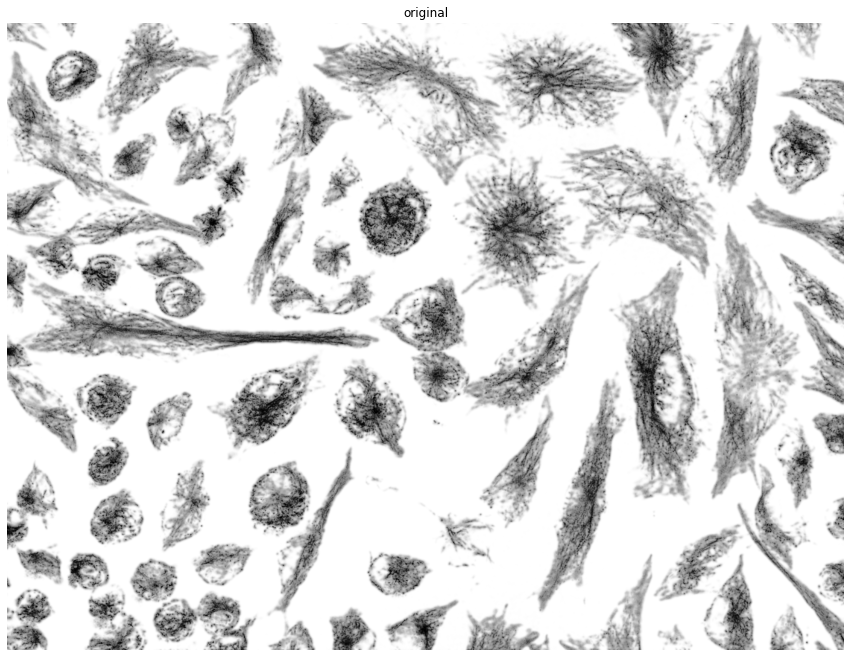

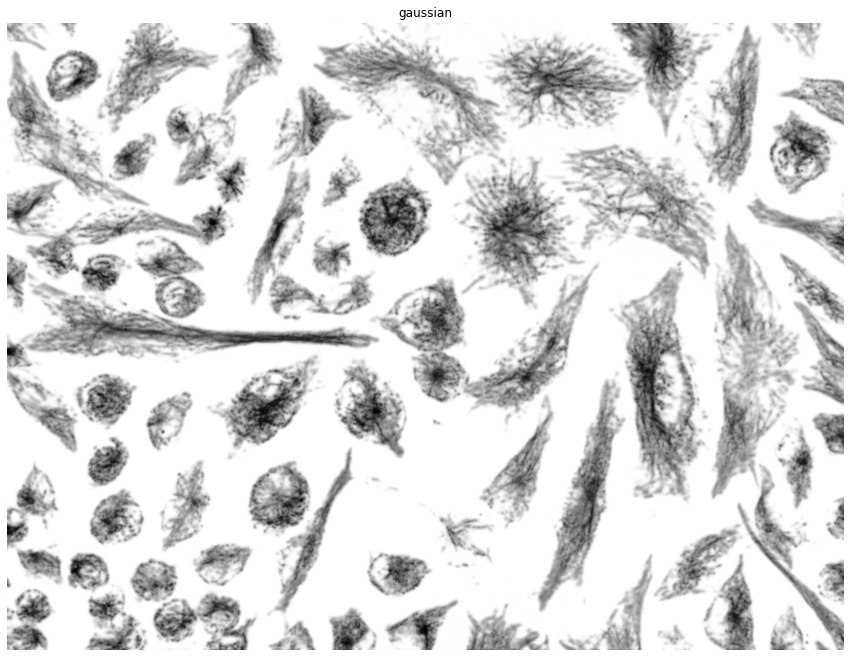

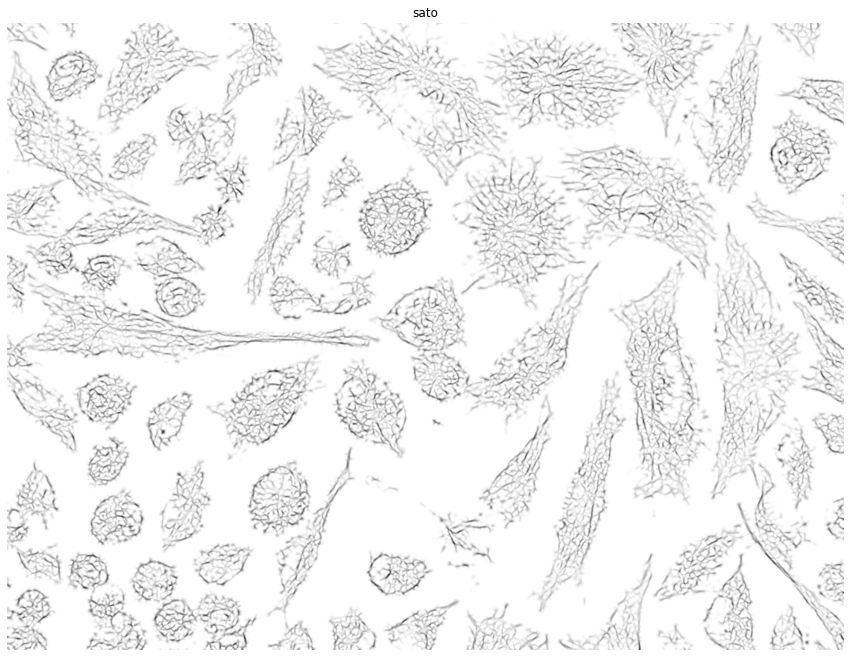

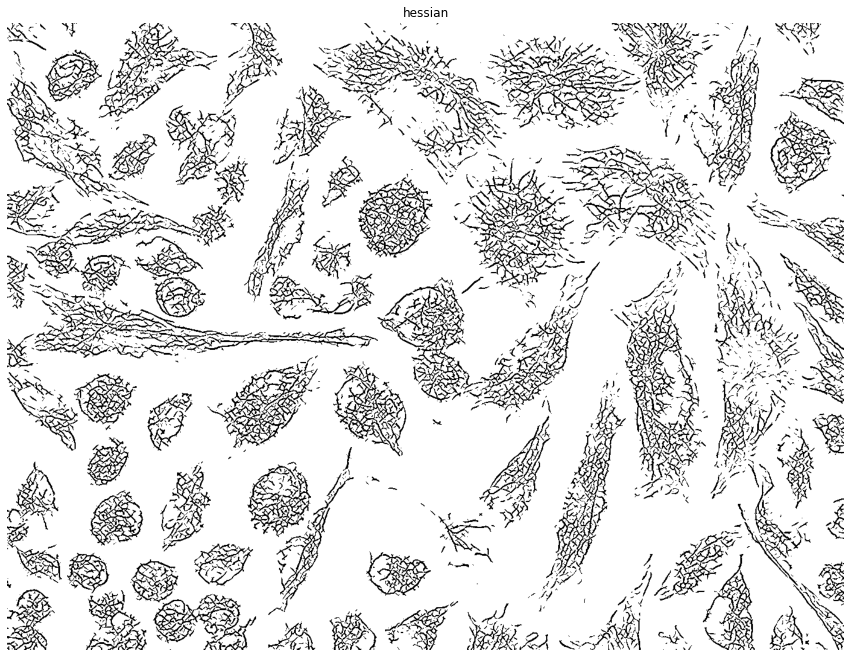

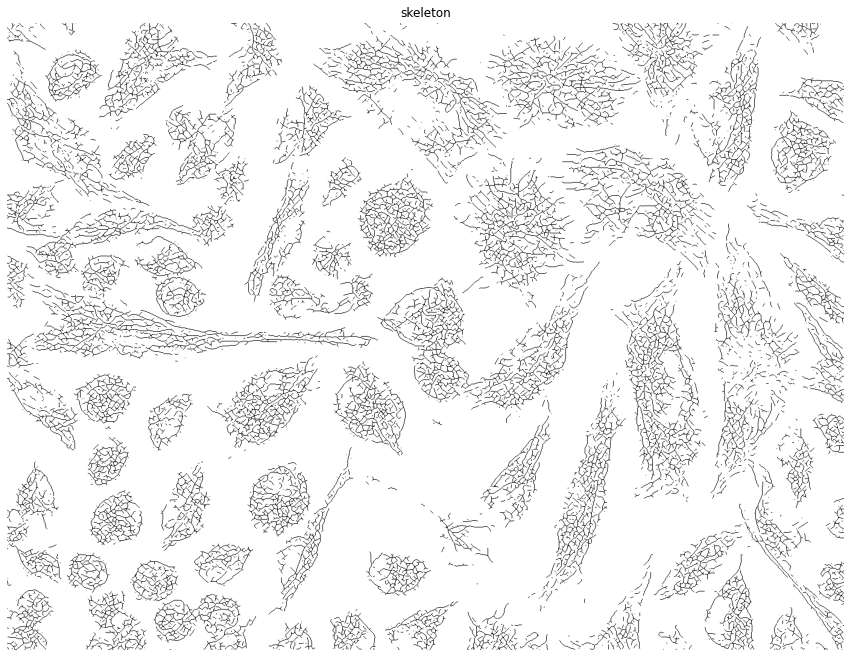

In [7]:
idx = data["CYTO"].index[0]

texture,skeleton = cytoskeleton_preprocessing([data['CYTO'].loc[idx]['Image']],  
                                              algorithm='new', 
                                              parameters=[1,1,0.006],
                                              plot=True,
                                              save=False)#save=folder+"\\" + str(image_id))

In [14]:
thresh = threshold_otsu(s)
binary_ori = s > thresh*0.2

sk = skeletonize(binary_ori) 

test3 = np.stack([sk*255,data['RGB']['Image'][INDEX][:,:,2],data['RGB']['Image'][INDEX][:,:,1]],axis=2)
ske = np.stack([sk*255,data['RGB']['Image'][INDEX][:,:,1],np.zeros_like(sk)],axis=2)

plt.figure(figsize=(15,15))
plt.imshow(test3,cmap='gray')
plt.show()

In [ ]:
def plot_overlayed_sk(img_id,image,sk):
    from scipy.ndimage import convolve
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu, laplace, threshold_yen, rank
from skimage.util import img_as_ubyte
from skimage.morphology import extrema, skeletonize, disk
from skimage import filters

# ------------------
INDEX = 11
SAVE  = False
# ------------------

# Original Image
img = data['RGB']['Image'][INDEX]

# Remove blue channel and convert to grayscale
tmp        = copy.deepcopy(img)
tmp[:,:,0] = 0
grey       = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)

# Yen thresholding for low intensity noise removal
thresh = threshold_yen(grey)
binary = grey > thresh*0.25
temp   = binary * grey

# Deconvolution
kernel = np.array([[-1, -1, -1],[-1, 17, -1], [-1,-1, -1]])*1/9
#kernel = np.array([[-1, -1, -1],[-1, 12, -1], [-1,-1, -1]])
#kernel = np.array([[0.17 , 0.67 , 0.17] , [0.67, 2.33 , 0.67], [0.17, 0.67, 0.17]])
#kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])

# Deconvolution with chosen kernel
a = cv2.filter2D(src=temp , ddepth=-1, kernel=kernel)


h = hessian(a,black_ridges=False,sigmas=[2],mode='reflect')
h = 1 - h.astype(np.uint8)

skeleton_pre = skeletonize(h)

# Contour Removal
contours, hierarchy = cv2.findContours((skeleton_pre*1).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  

# Filter contours with area above certain threshold
remo_contours = []
for contour in contours:
    if len(contour) <= 1:
        remo_contours.append(contour)
removed_out = np.zeros_like(h)
cv2.fillPoly(removed_out, pts = remo_contours, color=(255,255,255))

# Get final skeleton
sk = skeleton_pre*1 - removed_out/255
 


test3 = np.stack([1.3*(grey / np.max(grey)),1.5*sk*(grey / np.max(grey)), 0.4 * (data['RGB']['Image'][INDEX][:,:,0] / np.max(data['RGB']['Image'][INDEX][:,:,0]))],axis=2)
#test3 = np.stack([grey,np.zeros_like(OriginalDF['Image'][INDEX][:,:,2]),np.zeros_like(OriginalDF['Image'][INDEX][:,:,2])],axis=2)

mult = np.stack([0.9*(grey / np.max(grey)),sk*(grey / np.max(grey)), 0.4 * (data['RGB']['Image'][INDEX][:,:,0] / np.max(data['RGB']['Image'][INDEX][:,:,0]))],axis=2)
#test3 = np.stack([1.5*(grey / np.max(grey)),sk, 0.2 * (data['RGB']['Image'][INDEX][:,:,0] / np.max(data['RGB']['Image'][INDEX][:,:,0]))],axis=2)




###############################################################




INDEX = 11
sk = TextureDF['Skeleton'][INDEX]
grey = data['RGB']['Image'][INDEX][:,:,2]


#test3 = np.stack([1.3*(grey / np.max(grey)),1.5*sk*(grey / np.max(grey)), 0.4 * (data['RGB']['Image'][INDEX][:,:,0] / np.max(data['RGB']['Image'][INDEX][:,:,0]))],axis=2)
#test3 = np.stack([grey,np.zeros_like(OriginalDF['Image'][INDEX][:,:,2]),np.zeros_like(OriginalDF['Image'][INDEX][:,:,2])],axis=2)

mult = np.stack([1*(grey / np.max(grey)),sk*(grey / np.max(grey)), 0.6 * (data['RGB']['Image'][INDEX][:,:,0] / np.max(data['RGB']['Image'][INDEX][:,:,0]))],axis=2)
#test3 = np.stack([1.5*(grey / np.max(grey)),sk, 0.2 * (data['RGB']['Image'][INDEX][:,:,0] / np.max(data['RGB']['Image'][INDEX][:,:,0]))],axis=2)

%matplotlib qt
plt.figure()
plt.axis('equal')
plt.axis('off')
plt.imshow(mult)
plt.savefig(folder + "//cyto_nuc_skel_11.png",format='png',transparent=True,bbox_inches='tight',dpi=500)
plt.show()